## Introduction sur Pandas

Pandas est une librairie Python servant à la manipulation et à l’analyse des données. Elle est bâtie autour d’une structure de données appelée DataFrame. Pour faire simple, disons qu’un DataFrame pandas est un tableau comparable à une feuille de calcul Excel. Pandas fournit un grand nombre de méthodes pour modifier et traiter ce tableau. En particulier, il permet d’effectuer des requêtes de style SQL et d’opérer des jointures. À la différence de NumPy, qui oblige toutes les entrées à être de même type, pandas autorise des types différents dans les colonnes (par exemple des entiers, des dates, des nombres en virgule flottante et des chaînes de caractères)

Nous commencerons par les deux structures de données importantes suivantes de Pandas :
• Série
• Dataframe

#### SERIES
Une série est un objet de type tableau unidimensionnel étiqueté. Il est capable de contenir n'importe quel type de données, par ex. entiers,
flottants, chaînes, objets Python, etc. Il peut être vu comme une structure de données avec deux tableaux : un fonctionnant comme
l'index, c'est-à-dire les étiquettes, et l'autre contient les données réelles.

In [25]:
!pip install matplotlib
import pandas as pd
S = pd.Series([11, 28, 72, 3, 5, 8])
S
# Nous n'avons pas défini d'index dans notre exemple, mais nous voyons deux colonnes dans notre sortie : la colonne de droite contient
# nos données, tandis que la colonne de gauche contient l'index. Pandas a créé un index par défaut commençant par 0 allant jusqu'à 5,
# qui est la longueur des données moins 1.

Defaulting to user installation because normal site-packages is not writeable


0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In [26]:
print(S.index) # Pour acceder aux index
print(S.values) # Pour acceder aux valeurs

RangeIndex(start=0, stop=6, step=1)
[11 28 72  3  5  8]


Jusqu'à présent, nos séries n'ont pas été très différentes des ndarrays de Numpy. Cela change, dès que nous commençons définir des objets Series avec des indices individuels :

In [27]:
fruits = ['pommes', 'oranges', 'cerises', 'poires']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
S

pommes     20
oranges    33
cerises    52
poires     10
dtype: int64

In [28]:
our_fruits =  ["pommes", "mangos", "ananas"]
quantity = [20, 30, 40]

dispatch =  pd.Series(quantity, index=our_fruits=
dispatch

SyntaxError: invalid syntax (3637010392.py, line 4)

Si nous additionnons deux séries avec les mêmes indices, nous obtenons une nouvelle série avec le même indice et la valeur correspondante
les valeurs seront ajoutées :

In [ ]:
fruits = ['pommes', 'oranges', 'cerises', 'poires']
S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits)
print(S + S2)
print("somme de S : ", sum(S))

pommes     37
oranges    46
cerises    83
poires     42
dtype: int64
somme de S :  115


In [ ]:
# Si un indice n'existe pas dans les deux séries, la valeur de cette série sera NaN :
fruits = ['pommes', 'oranges', 'cerises', 'poires']
fruits2 = ['framboises', 'oranges', 'cerises', 'poires']
S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits2)
print(S + S2)

cerises       83.0
framboises     NaN
oranges       46.0
poires        42.0
pommes         NaN
dtype: float64


INDEXAGE

In [ ]:
print(S)
print(S['oranges'])

pommes     20
oranges    33
cerises    52
poires     10
dtype: int64
33


Cependant, les objets Series peuvent également être accessibles par plusieurs index en même temps. Cela peut être fait par regrouper les index dans une liste. Ce type d'accès renvoie à nouveau une série Pandas :

In [ ]:
print(S[['pommes', 'oranges', 'cerises']])

pommes     20
oranges    33
cerises    52
dtype: int64


In [ ]:
S[:]

pommes     20
oranges    33
cerises    52
poires     10
dtype: int64

Semblable à Numpy, nous pouvons utiliser des opérations scalaires ou des fonctions mathématiques sur une série :

In [ ]:
import numpy as np
print((S + 3))
print("======================")
print(np.sin(S))

pommes     23
oranges    36
cerises    55
poires     13
dtype: int64
pommes     0.912945
oranges    0.999912
cerises    0.986628
poires    -0.544021
dtype: float64


PANDAS.SERIES.APPLY
Series.apply(func, convert_dtype=True, args=(), **kwds)

In [ ]:
S.apply(np.sin)

pommes     0.912945
oranges    0.999912
cerises    0.986628
poires    -0.544021
dtype: float64

In [ ]:
# Nous pouvons également utiliser les fonctions Python lambda. 
#Supposons que nous ayons la tâche suivante. Le test de la quantité de
# fruits de toutes sortes. S'il y a moins de 50 disponibles, nous augmenterons le stock de 10 :
print(S)
S.apply(lambda x: x if x > 50 else x+10 )

pommes     20
oranges    33
cerises    52
poires     10
dtype: int64


pommes     30
oranges    43
cerises    52
poires     20
dtype: int64

In [ ]:
#Filtrage avec booléen
S[S!=30]

pommes     20
oranges    33
cerises    52
poires     10
dtype: int64

CRÉATION D'OBJETS DE SÉRIE À PARTIR DE DICTIONNAIRES

In [ ]:
cities = {"London": 8615246,
            "Berlin": 3562166,
            "Madrid": 3165235,
            "Rome": 2874038,
            "Paris": 2273305,
            "Vienna": 1805681,
            "Bucharest": 1803425,
            "Hamburg": 1760433,
            "Budapest": 1754000,
            "Warsaw": 1740119,
            "Barcelona": 1602386,
            "Munich": 1493900,
            "Milan": 1350680}
city_series = pd.Series(cities)
print(city_series)

London       8615246
Berlin       3562166
Madrid       3165235
Rome         2874038
Paris        2273305
Vienna       1805681
Bucharest    1803425
Hamburg      1760433
Budapest     1754000
Warsaw       1740119
Barcelona    1602386
Munich       1493900
Milan        1350680
dtype: int64


NAN - DONNÉES MANQUANTES

In [ ]:
my_cities = ["London", "Paris", "Zurich", "Berlin","Stuttgart", "Hamburg"]
my_city_series = pd.Series(cities,index=my_cities)
my_city_series

London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64

LES MÉTHODES ISNULL() ET NOTNULL()

In [ ]:
print(my_city_series.isnull())
print(my_city_series.notnull())

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool
London        True
Paris         True
Zurich       False
Berlin        True
Stuttgart    False
Hamburg       True
dtype: bool


FILTRER LES DONNÉES MANQUANTES

In [ ]:
print(my_city_series.dropna())
print(my_city_series)

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64
London       8615246.0
Paris        2273305.0
Zurich             NaN
Berlin       3562166.0
Stuttgart          NaN
Hamburg      1760433.0
dtype: float64


In [ ]:
# Si vous souhaitez que les modifications soient appliquées, vous devez l'enregistrer 
#dans une nouvelle variable
pas_de_nan = my_city_series.dropna()
pas_de_nan

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64

REMPLIR LES DONNÉES MANQUANTES

In [ ]:
# Remplir avec 0
print(my_city_series.fillna(0))

London       8615246.0
Paris        2273305.0
Zurich             0.0
Berlin       3562166.0
Stuttgart          0.0
Hamburg      1760433.0
dtype: float64


In [ ]:
#Remplir avec des donnees
missing_cities = {"Stuttgart":597939, "Zurich":378884}
my_city_series.fillna(missing_cities).astype('int') # On peut convertir pour avoir des nombres entiers

London       8615246
Paris        2273305
Zurich        378884
Berlin       3562166
Stuttgart     597939
Hamburg      1760433
dtype: int64

#### DATAFRAME

L'idée sous-jacente d'un DataFrame est basée sur
feuilles de calcul comme Excel. Nous pouvons voir la structure de données d'un DataFrame
sous forme de tableau et de tableur. Un DataFrame logiquement
correspond à une "feuille" d'un document Excel. UN DataFrame a à la fois une ligne et un index de colonne

In [ ]:
# Creer un dataframe a partir des series
years = range(2014, 2018)
shop1 = pd.Series([2409.14, 2941.01, 3496.83, 3119.55], index=years)
shop2 = pd.Series([1203.45, 3441.62, 3007.83, 3619.53], index=years)
shop3 = pd.Series([3412.12, 3491.16, 3457.19, 1963.10], index=years)
shops_df = pd.concat([shop1, shop2, shop3], axis=1)
shops_df

,0,1,2
2014,2409.14,1203.45,3412.12
2015,2941.01,3441.62,3491.16
2016,3496.83,3007.83,3457.19
2017,3119.55,3619.53,1963.10


In [ ]:
days = range(1, 6)
shop1 = pd.Series(["Monday 11th", "Tuesday 12th", "Wednesday 13th", "Thursday 14th", "Friday 15th"], index=days)
shop2 = pd.Series(["Monday 11th", "Tuesday 12th", "Wednesday 13th", "Thursday 14th", "Friday 15th"], index=days)

s =  pd.concat([shop1, shop2], axis=1)
s.columns = ["Shop1", "Shop2"]
s

,Shop1,Shop2
1,Monday 11th,Monday 11th
2,Tuesday 12th,Tuesday 12th
3,Wednesday 13th,Wednesday 13th
4,Thursday 14th,Thursday 14th
5,Friday 15th,Friday 15th


In [ ]:
type(shops_df)

pandas.core.frame.DataFrame

In [ ]:
#Nommer vos colonnes
cities = ["Zürich", "Winterthur", "Freiburg"]
shops_df.columns = cities
shops_df

,Zürich,Winterthur,Freiburg
2014,2409.14,1203.45,3412.12
2015,2941.01,3441.62,3491.16
2016,3496.83,3007.83,3457.19
2017,3119.55,3619.53,1963.10


DATAFRAMES DES DICTIONNAIRES

In [ ]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
                "Paris", "Vienna", "Bucharest", "Hamburg",
                "Budapest", "Warsaw", "Barcelona",
                "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                        2273305, 1805681, 1803425, 1760433,
                        1754000, 1740119, 1602386, 1493900,
                        1350680],
           "country": ["England", "Germany", "Spain", "Italy",
                        "France", "Austria", "Romania",
                        "Germany", "Hungary", "Poland", "Spain",
                        "Germany", "Italy"]}
city_frame = pd.DataFrame(cities)
city_frame

,name,population,country
0,London,8615246,England
1,Berlin,3562166,Germany
2,Madrid,3165235,Spain
3,Rome,2874038,Italy
4,Paris,2273305,France
5,Vienna,1805681,Austria
6,Bucharest,1803425,Romania
7,Hamburg,1760433,Germany
8,Budapest,1754000,Hungary
9,Warsaw,1740119,Poland


In [ ]:
# RÉCUPÉRATION DES NOMS DE COLONNES
city_frame.columns.values

array(['name', 'population', 'country'], dtype=object)

In [ ]:
#On peut renommer les colonnes
city_frame.rename(columns={"name":"Nom",
"country":"Pays","population":"Population"}, inplace=True) #Lorsque vous utilisez inplace=True, cela modifie les valeurs 
                                                           #dans le dataframe d'origine
city_frame


,Nom,Population,Pays
0,London,8615246,England
1,Berlin,3562166,Germany
2,Madrid,3165235,Spain
3,Rome,2874038,Italy
4,Paris,2273305,France
5,Vienna,1805681,Austria
6,Bucharest,1803425,Romania
7,Hamburg,1760433,Germany
8,Budapest,1754000,Hungary
9,Warsaw,1740119,Poland


In [ ]:
#INDEX PERSONNALISÉ
ordinals = ["first", "second", "third", "fourth",
"fifth", "sixth", "seventh", "eigth",
"ninth", "tenth", "eleventh", "twelvth",
"thirteenth"]
city_frame = pd.DataFrame(cities, index=ordinals)
city_frame

,name,population,country
first,London,8615246,England
second,Berlin,3562166,Germany
third,Madrid,3165235,Spain
fourth,Rome,2874038,Italy
fifth,Paris,2273305,France
sixth,Vienna,1805681,Austria
seventh,Bucharest,1803425,Romania
eigth,Hamburg,1760433,Germany
ninth,Budapest,1754000,Hungary
tenth,Warsaw,1740119,Poland


In [ ]:
# Utiliser une colonne comme un index
city_frame.set_index("country", inplace=True)
print(city_frame)

              name  population
country                       
England     London     8615246
Germany     Berlin     3562166
Spain       Madrid     3165235
Italy         Rome     2874038
France       Paris     2273305
Austria     Vienna     1805681
Romania  Bucharest     1803425
Germany    Hamburg     1760433
Hungary   Budapest     1754000
Poland      Warsaw     1740119
Spain    Barcelona     1602386
Germany     Munich     1493900
Italy        Milan     1350680


ACCÉDER AUX LIGNES VIA LES VALEURS D'INDEX

In [ ]:
city_frame = pd.DataFrame(cities, columns=("name", "population"),index=cities["country"])
city_frame.head() # Acceder les premiers elements 5 elements de votre dataframe
                  # On peut utiliser tail pour accesser au dernier elements

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305


In [ ]:
city_frame.tail()

,name,population
Hungary,Budapest,1754000
Poland,Warsaw,1740119
Spain,Barcelona,1602386
Germany,Munich,1493900
Italy,Milan,1350680


In [ ]:
print(city_frame.loc["Germany"]) #iloc

            name  population
Germany   Berlin     3562166
Germany  Hamburg     1760433
Germany   Munich     1493900


In [ ]:
# Il est également possible d'extraire simultanément des lignes en choisissant plus que sur 
#des étiquettes d'index. Pour ce faire, nous utilisons une liste d'indices :
print(city_frame.loc[["Germany", "France", "Spain"]])

              name  population
Germany     Berlin     3562166
Germany    Hamburg     1760433
Germany     Munich     1493900
France       Paris     2273305
Spain       Madrid     3165235
Spain    Barcelona     1602386


In [ ]:
# Acceder des elements avec condition
print(city_frame.loc[(city_frame.population < 2000000)]) # ou city_frame.population>2000000

              name  population
Austria     Vienna     1805681
Romania  Bucharest     1803425
Germany    Hamburg     1760433
Hungary   Budapest     1754000
Poland      Warsaw     1740119
Spain    Barcelona     1602386
Germany     Munich     1493900
Italy        Milan     1350680


ACCÉDER AUX LIGNES PAR POSITION: iloc

In [ ]:
print(city_frame)
df = city_frame.iloc[1]
print("Apres indexation")
print(df)

              name  population
England     London     8615246
Germany     Berlin     3562166
Spain       Madrid     3165235
Italy         Rome     2874038
France       Paris     2273305
Austria     Vienna     1805681
Romania  Bucharest     1803425
Germany    Hamburg     1760433
Hungary   Budapest     1754000
Poland      Warsaw     1740119
Spain    Barcelona     1602386
Germany     Munich     1493900
Italy        Milan     1350680
Apres indexation
name           Berlin
population    3562166
Name: Germany, dtype: object


Pour obtenir un DataFrame avec des lignes sélectionnées par des nombres, nous utilisons une liste d'entiers. Nous pouvons voir que nous pouvons changer
l'ordre des lignes et nous pouvons également sélectionner des lignes plusieurs fois :

In [ ]:
df = city_frame.iloc[[3, 2, 0, 5, 0]]
print(df)

           name  population
Italy      Rome     2874038
Spain    Madrid     3165235
England  London     8615246
Austria  Vienna     1805681
England  London     8615246


SOMME ET SOMME CUMULEE

In [ ]:
years = range(2014, 2019)
cities = ["Zürich", "Freiburg", "München", "Konstanz", "Saarbrücken"]
shops = pd.DataFrame(index=years)
for city in cities:
    shops.insert(loc=len(shops.columns),column=city,
                 value=(np.random.randint(1,1000, (5,))))
print(shops)

      Zürich  Freiburg  München  Konstanz  Saarbrücken
2014     649       161      229       888          861
2015      89       411      218       132          310
2016     629       359      956       317          982
2017     112       962      690       155          363
2018     276       564      912       422            3


In [ ]:
shops.sum()

Zürich         1755
Freiburg       2457
München        3005
Konstanz       1914
Saarbrücken    2519
dtype: int64

In [ ]:
# Pour faire la somme par ligne:
shops.sum(axis=1), #axis=1 pour faire la somme par ligne

(2014    2788
 2015    1160
 2016    3243
 2017    2282
 2018    2177
 dtype: int64,)

In [ ]:
# Tu peux faire la somme en accedant les colonnes qui tu veux
shops[["Zürich", "München", "Saarbrücken"]].sum()

Zürich         1755
München        3005
Saarbrücken    2519
dtype: int64

In [ ]:
#SOMME CUMULEE
print(shops)
x = shops.cumsum()
print(x)

      Zürich  Freiburg  München  Konstanz  Saarbrücken
2014     649       161      229       888          861
2015      89       411      218       132          310
2016     629       359      956       317          982
2017     112       962      690       155          363
2018     276       564      912       422            3
      Zürich  Freiburg  München  Konstanz  Saarbrücken
2014     649       161      229       888          861
2015     738       572      447      1020         1171
2016    1367       931     1403      1337         2153
2017    1479      1893     2093      1492         2516
2018    1755      2457     3005      1914         2519


In [ ]:
city_frame.head(10)
city_frame["cum_population"] = city_frame["population"].cumsum()
city_frame.head(10)


,name,population,cum_population
England,London,8615246,8615246
Germany,Berlin,3562166,12177412
Spain,Madrid,3165235,15342647
Italy,Rome,2874038,18216685
France,Paris,2273305,20489990
Austria,Vienna,1805681,22295671
Romania,Bucharest,1803425,24099096
Germany,Hamburg,1760433,25859529
Hungary,Budapest,1754000,27613529
Poland,Warsaw,1740119,29353648


ACCÉDER AUX COLONNES D'UNE DATAFRAME

In [ ]:
print(city_frame[["population", "name"]]) # Oubien city_frame.population

         population       name
England     8615246     London
Germany     3562166     Berlin
Spain       3165235     Madrid
Italy       2874038       Rome
France      2273305      Paris
Austria     1805681     Vienna
Romania     1803425  Bucharest
Germany     1760433    Hamburg
Hungary     1754000   Budapest
Poland      1740119     Warsaw
Spain       1602386  Barcelona
Germany     1493900     Munich
Italy       1350680      Milan


ASSIGNER DE NOUVELLES VALEURS À UNE COLONNE

In [ ]:
city_frame["area"] = 1572
print(city_frame)

              name  population  cum_population  area
England     London     8615246         8615246  1572
Germany     Berlin     3562166        12177412  1572
Spain       Madrid     3165235        15342647  1572
Italy         Rome     2874038        18216685  1572
France       Paris     2273305        20489990  1572
Austria     Vienna     1805681        22295671  1572
Romania  Bucharest     1803425        24099096  1572
Germany    Hamburg     1760433        25859529  1572
Hungary   Budapest     1754000        27613529  1572
Poland      Warsaw     1740119        29353648  1572
Spain    Barcelona     1602386        30956034  1572
Germany     Munich     1493900        32449934  1572
Italy        Milan     1350680        33800614  1572


In [ ]:
area = [1572, 891.85, 605.77, 1285,105.4, 414.6, 228, 755,525.2, 517, 101.9, 310.4,181.8]
city_frame["area"] = area
print(city_frame)


              name  population  cum_population     area
England     London     8615246         8615246  1572.00
Germany     Berlin     3562166        12177412   891.85
Spain       Madrid     3165235        15342647   605.77
Italy         Rome     2874038        18216685  1285.00
France       Paris     2273305        20489990   105.40
Austria     Vienna     1805681        22295671   414.60
Romania  Bucharest     1803425        24099096   228.00
Germany    Hamburg     1760433        25859529   755.00
Hungary   Budapest     1754000        27613529   525.20
Poland      Warsaw     1740119        29353648   517.00
Spain    Barcelona     1602386        30956034   101.90
Germany     Munich     1493900        32449934   310.40
Italy        Milan     1350680        33800614   181.80


TRI DES DATAFRAMES

In [ ]:
city_frame = city_frame.sort_values(by=["area"], ascending=False) #On peut combiner deux parametres                                                        #quand on fait le tri
print(city_frame)

              name  population  cum_population     area
England     London     8615246         8615246  1572.00
Italy         Rome     2874038        18216685  1285.00
Germany     Berlin     3562166        12177412   891.85
Germany    Hamburg     1760433        25859529   755.00
Spain       Madrid     3165235        15342647   605.77
Hungary   Budapest     1754000        27613529   525.20
Poland      Warsaw     1740119        29353648   517.00
Austria     Vienna     1805681        22295671   414.60
Germany     Munich     1493900        32449934   310.40
Romania  Bucharest     1803425        24099096   228.00
Italy        Milan     1350680        33800614   181.80
France       Paris     2273305        20489990   105.40
Spain    Barcelona     1602386        30956034   101.90


Remplacer des valeurs

In [ ]:
city_frame.loc['Germany','population'] = 1000000000
city_frame.head(10)

,name,population,cum_population,area
England,London,8615246,8615246,1572.00
Italy,Rome,2874038,18216685,1285.00
Germany,Berlin,1000000000,12177412,891.85
Germany,Hamburg,1000000000,25859529,755.00
Spain,Madrid,3165235,15342647,605.77
Hungary,Budapest,1754000,27613529,525.20
Poland,Warsaw,1740119,29353648,517.00
Austria,Vienna,1805681,22295671,414.60
Germany,Munich,1000000000,32449934,310.40
Romania,Bucharest,1803425,24099096,228.00


In [ ]:
#On peut utiliser at au lieu de loc
city_frame.at['England','name'] = "Paris"
city_frame.head(5)

,name,population,cum_population,area
England,Paris,8615246,8615246,1572.00
Italy,Rome,2874038,18216685,1285.00
Germany,Berlin,1000000000,12177412,891.85
Germany,Hamburg,1000000000,25859529,755.00
Spain,Madrid,3165235,15342647,605.77


In [ ]:
# On peut utiliser replace aussi
city_frame.replace("Paris", "Cotonou", inplace=False)

,name,population,cum_population,area
England,Cotonou,8615246,8615246,1572.00
Italy,Rome,2874038,18216685,1285.00
Germany,Berlin,1000000000,12177412,891.85
Germany,Hamburg,1000000000,25859529,755.00
Spain,Madrid,3165235,15342647,605.77
Hungary,Budapest,1754000,27613529,525.20
Poland,Warsaw,1740119,29353648,517.00
Austria,Vienna,1805681,22295671,414.60
Germany,Munich,1000000000,32449934,310.40
Romania,Bucharest,1803425,24099096,228.00


In [ ]:
city_frame.describe()

,population,cum_population,area
count,1.300000e+01,1.300000e+01,13.000000
mean,2.328449e+08,2.317462e+07,576.455385
std,4.373497e+08,7.917575e+06,452.103468
min,1.350680e+06,8.615246e+06,101.900000
25%,1.754000e+06,1.821668e+07,228.000000
50%,2.273305e+06,2.409910e+07,517.000000
75%,8.615246e+06,2.935365e+07,755.000000
max,1.000000e+09,3.380061e+07,1572.000000


PANDAS: GROUPBY

In [ ]:
import pandas as pd
beverages = pd.DataFrame({'Nom': ['Robert', 'Melinda', 'Brenda',
                                 'Samantha', 'Melinda', 'Robert','Melinda', 'Brenda', 'Samantha'],
                        'Cafe': [3, 0, 2, 2, 0, 2, 0, 1, 3],
                        'The': [0, 4, 2, 0, 3, 0, 3, 2, 0]})
beverages

,Nom,Cafe,The
0,Robert,3,0
1,Melinda,0,4
2,Brenda,2,2
3,Samantha,2,0
4,Melinda,0,3
5,Robert,2,0
6,Melinda,0,3
7,Brenda,1,2
8,Samantha,3,0


In [ ]:
res = beverages.groupby(['Nom']).sum() #Lorsque vous groupez par, vous devez effectuer une opération
print(res)

          Cafe  The
Nom                
Brenda       3    4
Melinda      0   10
Robert       5    0
Samantha     5    0


In [ ]:
beverages.groupby(['Nom']).mean() # Calculer la moyenne

,Cafe,The
Nom,,
Brenda,1.5,2.000000
Melinda,0.0,3.333333
Robert,2.5,0.000000
Samantha,2.5,0.000000


EXERCICES

In [ ]:
#1.Calculez les prix moyens des produits du DataFrame suivant :
d = {"products": ["Oppilume", "Dreaker", "Lotadilo",
"Crosteron", "Wazzasoft", "Oppilume",
"Dreaker", "Lotadilo", "Wazzasoft"],
"colours": ["blue", "blue", "blue",
"green", "blue", "green",
"green", "green", "red"],
"customer_price": [2345.89, 2390.50, 1820.00,
3100.00, 1784.50, 2545.89,
2590.50, 2220.00, 2084.50],
"non_customer_price": [2445.89, 2495.50, 1980.00,
3400.00, 1921.00, 2645.89,2655.50, 2140.00, 2190.00]}
product_prices = pd.DataFrame(d)
product_prices
#2.Calculez la somme du prix en fonction des couleurs.
#Solutions
#1.x = product_prices.groupby("products").mean()
#2.x = product_prices.groupby("colours").sum()

,products,colours,customer_price,non_customer_price
0,Oppilume,blue,2345.89,2445.89
1,Dreaker,blue,2390.50,2495.50
2,Lotadilo,blue,1820.00,1980.00
3,Crosteron,green,3100.00,3400.00
4,Wazzasoft,blue,1784.50,1921.00
5,Oppilume,green,2545.89,2645.89
6,Dreaker,green,2590.50,2655.50
7,Lotadilo,green,2220.00,2140.00
8,Wazzasoft,red,2084.50,2190.00


LECTURE ET ECRITURE DES DONNEES

In [ ]:
#LECTURE DES FICHIERS CSV
df = pd.read_csv("covid19.csv") #
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Median Age (Years),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported


In [ ]:
df

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Median Age (Years),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0000,65.0000,5.89,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0000,65.0000,5.56,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0000,65.0000,4.50,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0000,65.0000,7.78,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0000,65.0000,6.00,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,26-03-2020,NaN,Mexico,475,6,70,1,23.6345,-102.5528,22.50,...,0.003684,23.43,33.14,73.5,79.2,9481,86.28,41.313,Not Reported,NaN
1135,27-03-2020,NaN,Mexico,585,8,110,2,23.6345,-102.5528,20.89,...,0.004537,23.43,33.14,73.5,79.2,9481,86.28,41.313,Not Reported,NaN
1136,28-03-2020,NaN,Mexico,717,12,132,4,23.6345,-102.5528,19.83,...,0.005561,23.43,33.14,73.5,79.2,9481,86.28,41.313,Not Reported,NaN
1137,29-03-2020,NaN,Mexico,848,16,131,4,23.6345,-102.5528,18.50,...,0.006577,23.43,33.14,73.5,79.2,9481,86.28,41.313,Not Reported,NaN


In [ ]:
df.columns.values

array(['Date', 'State', 'Country', 'Cumulative_cases', 'Cumulative_death',
       'Daily_cases', 'Daily_death', 'Latitude', 'Longitude',
       'Temperature', 'Min_temperature', 'Max_temperature', 'Wind_speed',
       'Precipitation', 'Fog_Presence', 'Population',
       'Population Density/km', 'Median_Age', 'Sex Ratio', 'Age%_65+',
       'Hospital Beds/1000', 'Available Beds/1000',
       'Confirmed Cases/1000', 'Lung Patients (F)', 'Lung Patients (M)',
       'Median Age (Years)', 'Life Expectancy (M)', 'Life Expectancy (F)',
       'Total_tests_conducted', 'Out_Travels (mill.)',
       'In_travels(mill.)', 'Domestic_Travels (mill.)'], dtype=object)

In [ ]:
#Ecrire un dataframe sur un fichier, on utilise to_csv
beverages.to_csv("beverages.csv")

EXERCISE
• Lisez le fichier dsv (csv) bundeslaender.txt (https://python-course.eu/data1/bundeslaender.txt). Créez un nouveau fichier avec les colonnes 'land', 'area',
'femme', 'homme', 'population' et 'densité' (habitants par kilomètre carré.
• imprimer les lignes où la zone est supérieure à 30000 et la population est supérieure à 10000
• Imprimer les lignes dont la densité est supérieure à 300

LECTURE ET ECRITURE DE FICHIERS EXCEL

In [ ]:
%pip install xlrd # On a besoin de cette dependence pour lire les fichiers excel

Note: you may need to restart the kernel to use updated packages.


In [ ]:
excel_file = pd.ExcelFile("file_example.xls")
sheet = pd.read_excel("file_example.xls")
sheet

FileNotFoundError: [Errno 2] No such file or directory: 'file_example.xls'

In [ ]:
docu = {}
for sheet_name in excel_file.sheet_names:
    docu[sheet_name] = excel_file.parse(sheet_name)#On utilise parse pour acceder au contenu de chaque feuille
for sheet_name in docu:
    print("\n" + sheet_name + ":\n", docu[sheet_name])

In [ ]:
#Acceder la sheet 1
sheet1 = docu["Sheet1"].copy()

In [ ]:
sheet1.head()

In [ ]:
%pip install openpyxl

In [ ]:
writer = pd.ExcelWriter('autre_fichier.xlsx')
sheet1.to_excel(writer,'autre_fichier.xlsx')

TRAITER AVEC NAN

In [ ]:
temp_df = pd.read_csv("temperatures.csv",sep=";",decimal=",")
temp_df.head()

In [ ]:
temp_df.columns = ["time","sensor1", "sensor2","sensor3","sensor4","sensor5","sensor6"]

In [ ]:
# Pour vérifier si nous avons NaN ou nulls
temp_df.isnull().sum() #oubien isna()

UTILISATION DE DROPNA SUR LA DATAFRAME

In [ ]:
df = temp_df.dropna()
df.isna().sum()

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
#'dropna' peut également être utilisé pour supprimer toutes les colonnes
#dans lesquelles certaines valeurs sont NaN
df = temp_df.dropna(axis=1)
df.head()

VISUALISATION DES DONNÉES AVEC PANDAS

In [ ]:
data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))
s.plot()

In [ ]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
S.plot()

In [32]:
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
"Paris", "Vienna", "Bucharest", "Hamburg","Budapest", "Warsaw", "Barcelona","Munich", "Milan"],
"population": [8615246, 3562166, 3165235, 2874038,2273305, 1805681, 1803425, 1760433,
1754000, 1740119, 1602386, 1493900,1350680],
"area" : [1572, 891.85, 605.77, 1285,105.4, 414.6, 228, 755,525.2, 517, 101.9, 310.4,181.8]
}
city_frame = pd.DataFrame(cities,columns=["population", "area"],index=cities["name"])
print(city_frame)

           population     area
London        8615246  1572.00
Berlin        3562166   891.85
Madrid        3165235   605.77
Rome          2874038  1285.00
Paris         2273305   105.40
Vienna        1805681   414.60
Bucharest     1803425   228.00
Hamburg       1760433   755.00
Budapest      1754000   525.20
Warsaw        1740119   517.00
Barcelona     1602386   101.90
Munich        1493900   310.40
Milan         1350680   181.80


<Axes: >

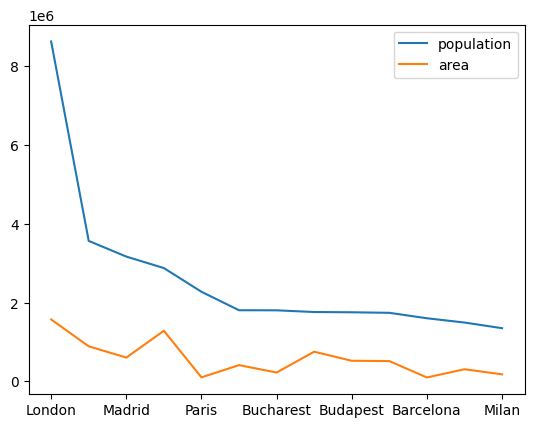

In [39]:
city_frame["area"] *= 1000 
city_frame.plot()

Ce tracé n'est pas à la hauteur de nos attentes, car tous les noms de villes ne sont pas
apparaissent sur l'axe des x. Nous pouvons changer cela en définissant explicitement les xticks avec
"range(len((city_frame.index))". De plus, nous devons définir use_index sur True,
pour que nous obtenions des noms de villes et non des nombres de 0 à len((city_frame.index):

<Axes: >

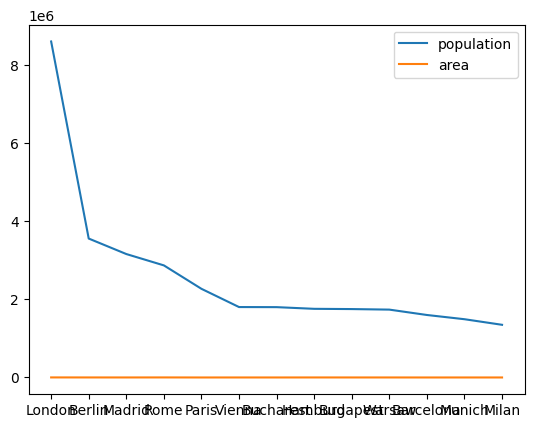

In [38]:
city_frame.plot(xticks=range(len(city_frame.index)),
use_index=True)

<Axes: >

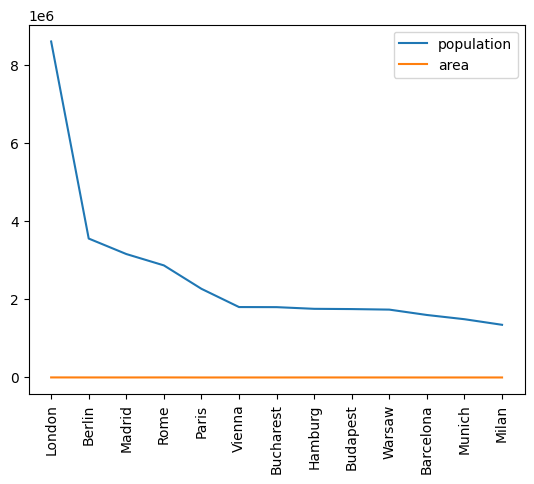

In [37]:
city_frame.plot(xticks=range(len(city_frame.index)),use_index=True,rot=90)

BAR PLOTS EN PANDAS

<Axes: >

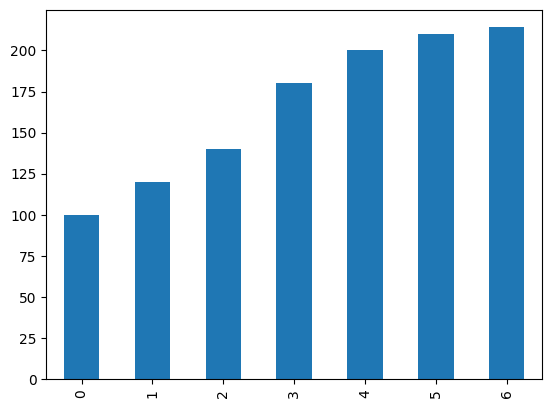

In [34]:
data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))
s.plot(kind='bar')

DIAGRAMMES CAMETIERS(PIE CHARTS) EN PANDAS

apples      20
pears       30
cherries    40
bananas     10
Name: series, dtype: int64


<Axes: ylabel='series'>

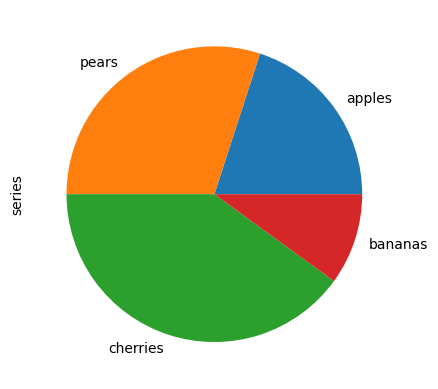

In [36]:
fruits = ['apples', 'pears', 'cherries', 'bananas']
series = pd.Series([20, 30, 40, 10],index=fruits,name='series')
print(series)
series.plot.pie()


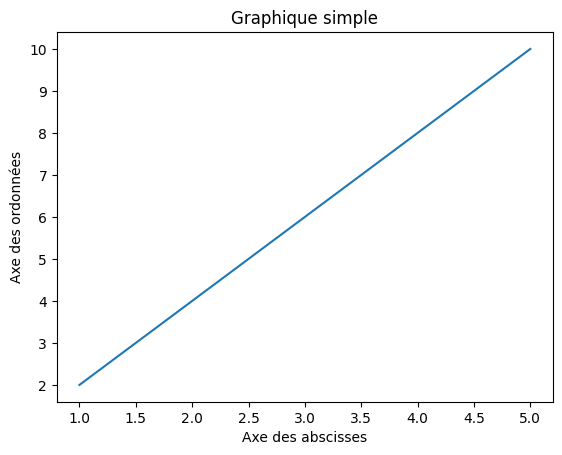

In [40]:
import matplotlib.pyplot as plt

# Données du graphique
x = [1, 2, 3, 4, 5]  # Valeurs de l'axe des abscisses
y = [2, 4, 6, 8, 10]  # Valeurs de l'axe des ordonnées

# Création du graphique
plt.plot(x, y)

# Ajout des étiquettes des axes
plt.xlabel('Axe des abscisses')
plt.ylabel('Axe des ordonnées')

# Ajout d'un titre
plt.title('Graphique simple')

# Affichage du graphique
plt.show()
